In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data for project 1.csv')
data.head(3)

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year
0,Abakan,2020,13495,14940,0,0,0,0,0,0,0,0,0,0,28435
1,Aikhal,2020,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Loss,2020,0,0,0,0,0,0,0,0,0,0,0,0,0


# Step 1. Bad data.
Your company is a newcomer to the Russian market, so you do not have your own qualitative data on transportation in Russia, and access to local Russian paid resources is not yet acquired.

Colleagues from London shared their data, but the quality of data on Russia leaves much to be desired.

In this step, you need to put rows in a separate dataframe named Backup that contain other characters in the Airport name column besides Latin letters, digits, hyphens, dashes and round brackets. We’ll consider these lines corrupted.

Verification task: how many damaged lines did your colleagues send you?

In [2]:
good_symbols_string = 'A B C D E F G H I J K L M N O P Q R S T U V W X Y Z '
good_symbols_string += 'a b c d e f g h i j k l m n o p q r s t u v w x y z '
good_symbols_string += '- ) ( '
good_symbols_string += '0 1 2 3 4 5 6 7 8 9'
good_symbols = good_symbols_string.split(' ')
good_symbols.append(' ')

def bad_symbol(a, good_symbols):
    for i in a:
        if i not in good_symbols:
            return False
    return True

good_port_list = []

for i in data['Airport name']:
    if bad_symbol(i, good_symbols) == True:
        good_port_list.append(i)
        
df = data[data['Airport name'].isin(good_port_list)==True]
backup = data[data['Airport name'].isin(good_port_list)==False]

backup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 29 to 3911
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airport name  332 non-null    object
 1   Year          332 non-null    int64 
 2   January       332 non-null    int64 
 3   February      332 non-null    int64 
 4   March         332 non-null    int64 
 5   April         332 non-null    int64 
 6   May           332 non-null    int64 
 7   June          332 non-null    int64 
 8   July          332 non-null    int64 
 9   August        332 non-null    int64 
 10  September     332 non-null    int64 
 11  October       332 non-null    int64 
 12  November      332 non-null    int64 
 13  December      332 non-null    int64 
 14  Whole year    332 non-null    int64 
dtypes: int64(14), object(1)
memory usage: 41.5+ KB


# Step 2. Legacy.
In this step your task is to understand which airports for 2007 - 2020 did not accept any aircraft.

Verification task: how many airports do not accept aircraft?

Note that the corrupted data we discarded in the first step is not used in the next steps.

In [17]:
a = df.groupby('Airport name')['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December','Whole year'].agg('sum')
ab = a[a['Whole year']==0].count()


/var/folders/z2/t5p0hqvs2m341q1b8lvg863w0000gn/T/ipykernel_1604/2965750286.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = df.groupby('Airport name')['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December','Whole year'].agg('sum')


# Step 3. Airports stopped.
In this step, your task is to analyze which airports hosted aircraft in 2007-2017, but stopped accepting them in 2018 - 2020.

Test assignment: How many airports ceased operations in 2018 - 2020?

Hint: An airport is considered to have stopped operating for the current year only if the number of passengers carried in the column 'Whole year' is 0. If data for any airport for any year is not available, it cannot be clearly concluded that the airport is closed.

Recommendation: Withdraw the list of closed airports in 2018, separately withdraw the list of closed airports in 2019 and, similarly, in 2020. If the airport is repeated several times, it must be counted once. For example, Airport A did not receive ships in 2018, 2019 and 2020, Airport B did not receive ships in 2019 and 2020, Airport C did not receive ships until 2020. Accordingly, we take into account airport A time, airport C time, airport C also once. The correct answer in this example is: 3 airports.

In [66]:
airports_7_10 = df[((df['Year'] <= 2017)&(df['Whole year']>0))]
working_airports = list(airports_7_10['Airport name'])

df[df['Airport name'].isin(working_airports) & (df['Year']==2018) & (df['Whole year']==0)]

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year
3932,Plastun,2018,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
df[(df['Airport name'].isin(working_airports)) & (df['Year'] == 2019 ) & (df['Whole year'] == 0)]

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year
3933,Plastun,2019,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
df[(df['Airport name'].isin(working_airports)) & (df['Year'] == 2020 ) & (df['Whole year'] == 0)]

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year
215,Khabarovsk (MVL),2020,0,0,0,0,0,0,0,0,0,0,0,0,0
3934,Plastun,2020,0,0,0,0,0,0,0,0,0,0,0,0,0


# Step 4. Hot season.
In this step, you need to calculate the total number of ships received per year for each airport, excluding those airports that accept more than 5,000 passengers per year. We are not interested in the largest airports, as the company is engaged in regional transportation.

Find the 50 most used airports among the remaining.

Calculate their data by months. Build a graph where the x-axis is months, and the y-axis is the number of passengers each month at the 50 most used airports.

Verification task: what is the difference between the most busy and the least busy month of 1,000 people? (rounded down)

Hint: Exclude 2020 because the data for the first two months do not allow reliable information about annual traffic at a particular airport. To exclude airports that accept more than 5,000 passengers per year, filter out the 'Whole year' column.

In [110]:
import math

more_5_mln = df[(df['Whole year'] > 5000000) & (df['Year'] != 2020)]

more_5_mln_airport = set(more_5_mln['Airport name'])

less_5_mln = df[(df['Airport name'].isin(more_5_mln_airport) == False)]

In [164]:
top_50 = less_5_mln.groupby('Airport name')['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December','Whole year'].agg('sum')
top_50 = top_50.sort_values(by='Whole year', ascending = False)
top_50 = top_50.head(50)

/var/folders/z2/t5p0hqvs2m341q1b8lvg863w0000gn/T/ipykernel_1604/2831079224.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_50 = less_5_mln.groupby('Airport name')['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December','Whole year'].agg('sum')


26114

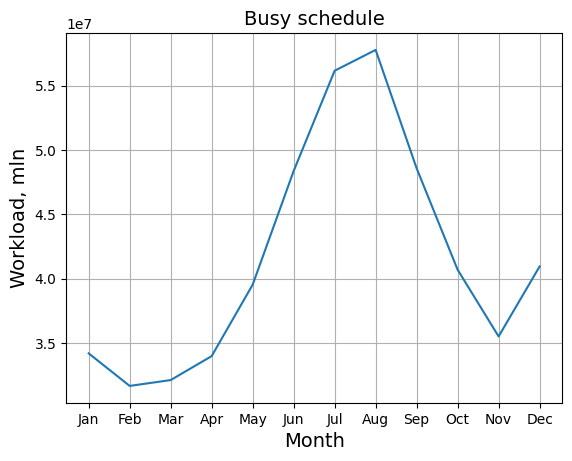

In [136]:
January = top_50['January'].sum()
February =  top_50['February'].sum()
March =  top_50['March'].sum()
April =  top_50['April'].sum()
May =  top_50['May'].sum()
June =  top_50['June'].sum()
July = top_50['July'].sum()
August =  top_50['August'].sum()
September =  top_50['September'].sum()
October =  top_50['October'].sum()
November =  top_50['November'].sum()
December =  top_50['December'].sum()



x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = [January, February, March, April, May, June, July, August, September, October, November, December]

plt.title('Busy schedule', fontsize = 14)

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Workload, mln', fontsize = 14)


plt.grid(True)
plt.plot(x, y)

math.floor((August - February) / 1000)

# Step 5. Perspective directions. 

At this step you need to determine the top 5 airports from the 50 most used, where the percentage increase in annual passenger traffic between 2007 and 2019 was the maximum.

Build a beautiful visualization of these 5 airports to convince the leadership in London to begin expansion into the Russian market with these promising airports.

Verification task: specify these top 5 airports

In [148]:
result = {}

top_50 = top_50.reset_index()
top_50_list = list(top_50['Airport name'])

df_2007 = df[(df['Year'] == 2007) & (df['Airport name'].isin(top_50_list))]
df_2019 = df[(df['Year'] == 2019) & (df['Airport name'].isin(top_50_list)) ]

for i in top_50_list:
    if str(df_2019[df_2019['Airport name'] == i]['Whole year'].max()).isdigit()  == True:
        a = int(df_2019[df_2019['Airport name'] == i]['Whole year'].max())
    
        if str(df_2007[df_2007['Airport name'] == i]['Whole year'].max()).isdigit() == True:
            b = int(df_2007[df_2007['Airport name'] == i]['Whole year'].max())
            
            if b != 0:
                change = (a - b) / b
                result[i] = change
                
new_df = pd.DataFrame(index = result.keys(), data = result.values())
new_df.sort_values(by=0, ascending = False)

,0
Voronezh (Chertovitskoe),4.666927
Nizhny Novgorod (Strigino),3.167735
Astrakhan (Narimanovo),2.717216
Stavropol (Shpakovskoye),2.650072
Vladivostok (Knevichi),2.355048
Mineral water,2.354386
Krasnodar (Paszkowski),2.333465
Reads (tub),2.189672
Ufa,2.152946
Volgograd (Gumrak),2.152138
